# Onset Time Calculation 2014-01-07
Going to investigate the automation of start and end times of the onset phase. For simplicity we will use the manual background timings from Hugh's paper and incorporate our automatic ones afterwards in order to see the difference in results.

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import re

from scipy.io import readsav
from scipy import stats
from scipy import signal

from astropy.time import Time
from astropy.time import TimeDelta

from sunpy import timeseries as ts
from sunpy.net import attrs as a
from sunpy.net import Fido
from sunpy.time import parse_time, find_time

import pandas as pd

import goesxrs_temp as gtem #from Ian's functions

from Onsets_temp import *

# Just setup plot fonts
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular", 'axes.linewidth' : 2})

In [12]:
data = r"C:\Users\William\Documents\University\MastersProj\Data\Test\GOES15_2s\sci_gxrs-l2-irrad_g15_d20140107_v0-0-0.nc"
g15 = ts.TimeSeries(data, concatenate=True)
trange = a.Time("2014-01-07 10:00:00", "2014-01-07 11:00:00")
trunc_g15=g15.truncate(trange.start.iso,trange.end.iso)
g_tims = trunc_g15.index
g_short = trunc_g15.quantity("xrsa").value
g_long = trunc_g15.quantity("xrsb").value

c:\Users\William\Documents\University\MastersProj\hot_onset\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\William\Documents\University\MastersProj\hot_onset\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\William\Documents\University\MastersProj\hot_onset\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


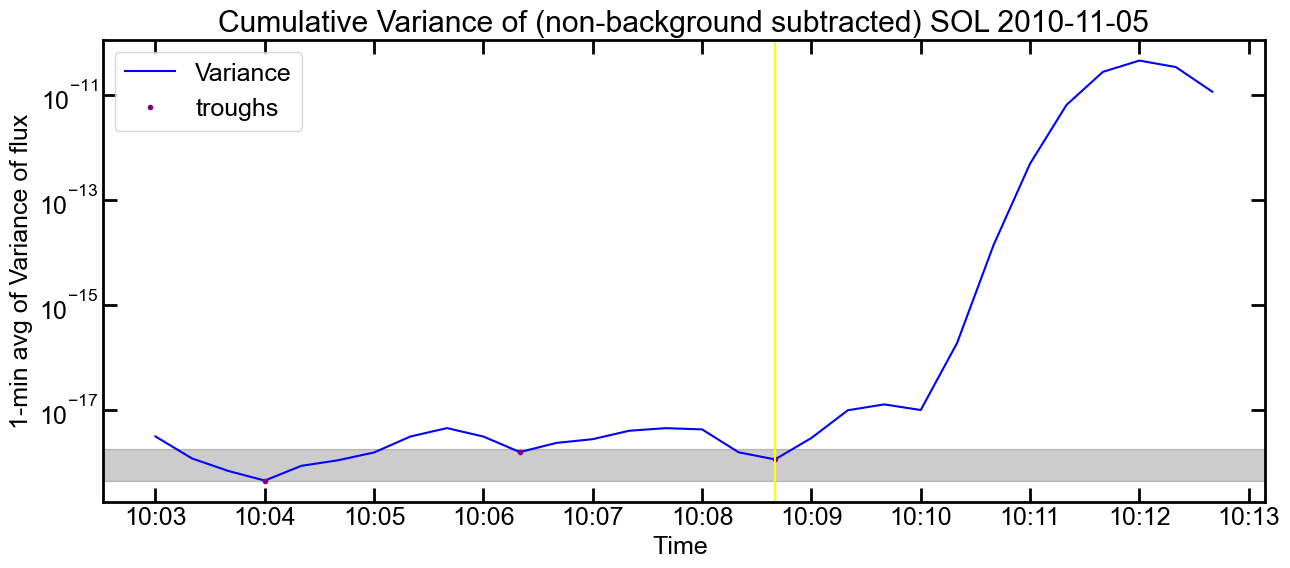

In [30]:
trange_search = a.Time("2014-01-07 10:02:00", "2014-01-07 10:13:00")
trunc_search = g15.truncate(trange_search.start.iso,trange_search.end.iso)
g_tims_bcksr = trunc_search.index
g_short_bcksr = trunc_search.quantity("xrsa").value

vars_0 = []
for i in range(0,len(g_short_bcksr)):
    var = np.var(g_short_bcksr[i-30:i])
    vars_0.append(var)

smooth = pd.Series(vars_0, index = pd.DatetimeIndex(g_tims_bcksr))
smooth = smooth.resample('20S').mean()
df = pd.DataFrame({'Time': smooth.index, 'Variance': smooth.values})
df = df.dropna()

# Finding Troughs
trs, _ = signal.find_peaks(np.negative(df['Variance']), plateau_size = 1)

tr_time = []
tr_var = []
for t in trs:
    if df.iloc[t]['Variance'] >= min(df['Variance'].values) and df.iloc[t]['Variance'] <= min(df['Variance'].values)*4:
        tr_time.append(df.iloc[t]['Time'])
        tr_var.append(df.iloc[t]['Variance'])
    else:
        continue
    

fig,ax = plt.subplots(figsize=(15, 6))
plt.title('Cumulative Variance of (non-background subtracted) SOL 2010-11-05')
#plt.plot(g_tims_bcksr, vars_0, color = 'blue', label = 'Variance')
plt.plot(smooth, color = 'blue', label = 'Variance')
plt.plot(tr_time, tr_var,'.', color = 'purple', label ='troughs')
# plt.plot(g_tims_bcksr, g_short_bcksr, color = 'purple', label = 'flux')
# ax.axvline(datetime.strptime("11/05/10 13:29:00", '%m/%d/%y %H:%M:%S'), color = 'Yellow', label = 'Peak')
# ax.axvline(datetime.strptime("11/05/10 13:07:40", '%m/%d/%y %H:%M:%S'), color = 'r', label = 'onset time')
# ax.axvline(datetime.strptime("11/05/10 13:09:30", '%m/%d/%y %H:%M:%S'), color = 'r')
# for b in range(0, len(plat_st_time)): 
#     ax.axvspan(plat_st_time[b], plat_end_time[b],color='black',alpha=0.2)
# ax.axvline(datetime.strptime("11/05/10 13:06:19", '%m/%d/%y %H:%M:%S'), color = 'grey', label = 'Hughs Background time')
# ax.axvline(datetime.strptime("11/05/10 13:07:30", '%m/%d/%y %H:%M:%S'), color = 'grey')
# ax.axvline(datetime.strptime("11/05/10 13:01:08", '%m/%d/%y %H:%M:%S'), color = 'black', label = 'My Background time')
# ax.axvline(datetime.strptime("11/05/10 13:02:08", '%m/%d/%y %H:%M:%S'), color = 'black')
#ax.axhline(np.median(g_short), color = 'green', label = 'median daily flux')
ax.axhspan(min(df['Variance'].values), min(df['Variance'].values)*4, color = 'black', alpha = 0.2)
ax.axvline(max(tr_time), color = 'yellow')
ax.set_ylabel("1-min avg of Variance of flux")
ax.set_xlabel("Time ")
#ax.set_ylim(0e-17, 1e-17)
ax.set_yscale("log")
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=1)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
plt.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
plt.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
plt.tick_params(which='major', size=10, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=5, width=2, direction='in', right='on')
plt.legend()
plt.show()

#### Background-subtracted flare 2014-01-07

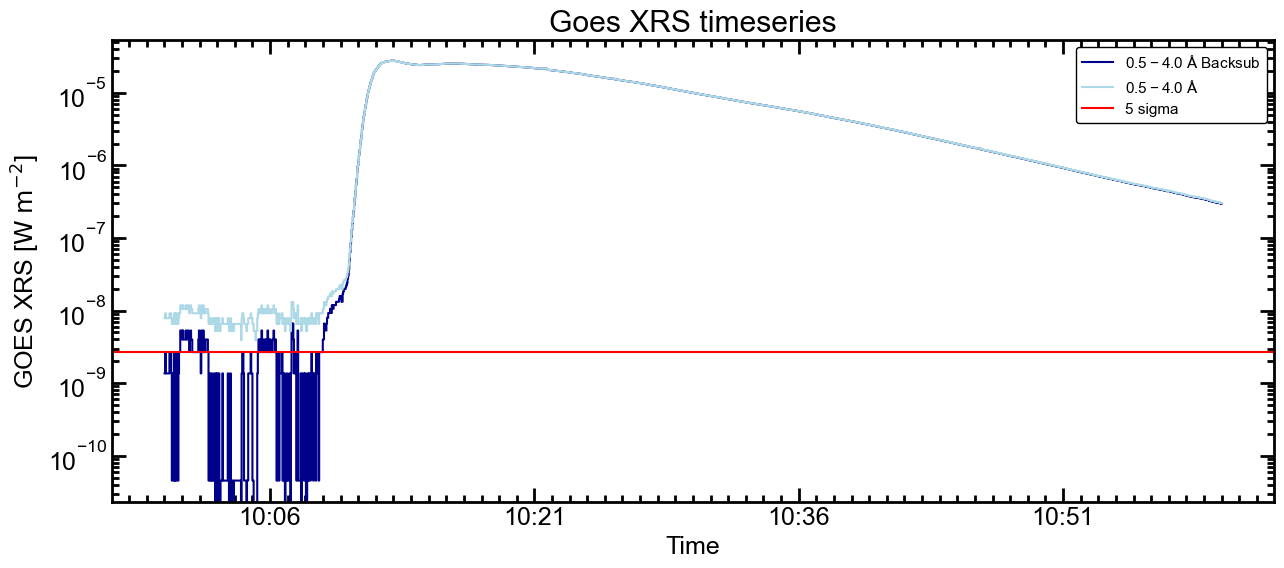

In [14]:


#bcktrange = a.Time("2014-01-07 10:00:57", "2014-01-07 10:07:36") #Hugh;s background
bcktrange = a.Time("2014-01-07 10:03:20", "2014-01-07 10:04:20") #My background
bcktrunc_g15=g15.truncate(bcktrange.start.iso,bcktrange.end.iso)
bckg_tims = bcktrunc_g15.index

bckg_short = np.mean(bcktrunc_g15.quantity("xrsa").value)
bckg_short_std = np.std(bcktrunc_g15.quantity("xrsa").value)
bckg_long = np.mean(bcktrunc_g15.quantity("xrsb").value)

g_short_sub = g_short - bckg_short
g_long_sub = g_long - bckg_long

fig,ax = plt.subplots(figsize=(15, 6))
plt.title("Goes XRS timeseries")
plt.plot(g_tims, g_short_sub, drawstyle='steps-post', color = 'darkblue', label = r"$0.5-4.0\;\AA$ Backsub")
plt.plot(g_tims, g_short, drawstyle='steps-post', color = 'lightblue', label = r"$0.5-4.0\;\AA$")
plt.axhline(5*bckg_short_std, label = "5 sigma", color = 'r')
ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Time")
ax.set_yscale("log")
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=15)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
plt.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
plt.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
plt.tick_params(which='major', size=10, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=5, width=2, direction='in', right='on')
plt.legend(fancybox = True, fontsize = 11, framealpha = 1, edgecolor = 'black')
plt.show()

#### Start Time of Onset: 5 sigma rule

We will use the '5-sigma' rule to identify the start of the onset phase here. Want to find the first point after the background sub period that is above 5 standard deviations of the variance of the background sub period.

In [15]:
#Start by truncating short channel data from end of background interval (or start time) to peak time.
#trange_search = a.Time("2010-11-05 13:07:30", "2010-11-05 13:29:00") #Hugh's background time
trange_search = a.Time("2014-01-07 10:07:00", "2014-01-07 10:13:00") #My background time
trunc_srch = g15.truncate(trange_search.start.iso,trange_search.end.iso)
g_tims_srch = trunc_srch.index
g_short_srch = trunc_srch.quantity("xrsa").value
g_short_srch = g_short_srch - bckg_short

#Find first point above 5-sigma
onset_start = g_tims_srch[(next(i for i, v in enumerate(g_short_srch) if v >= 5*bckg_short_std))]
print(onset_start)


2014-01-07 10:07:13.148000


### End time of onset: Cumulative Variance approach

We will first look at the cumulative variance of the flux, and then the temperature.

c:\Users\William\Documents\University\MastersProj\hot_onset\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\William\Documents\University\MastersProj\hot_onset\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\William\Documents\University\MastersProj\hot_onset\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


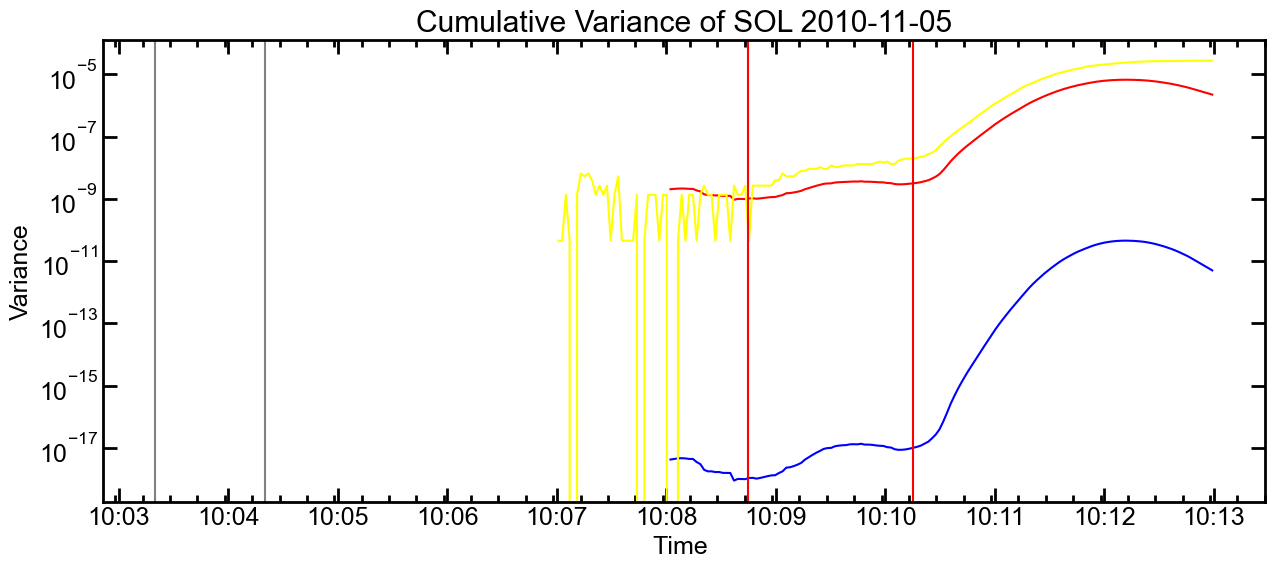

In [16]:
#Calculating the cumulative variance at each point
vars = []
for i in range(0,len(g_short_srch)):
    var = np.var(g_short_srch[i-30:i])
    vars.append(var)

#Calculating the turning point through 'find peaks'
from scipy.signal import find_peaks
from datetime import datetime

fig,ax = plt.subplots(figsize=(15, 6))
plt.title('Cumulative Variance of SOL 2010-11-05')
plt.plot(g_tims_srch, np.sqrt(vars), color = 'red', label = 'std')
plt.plot(g_tims_srch, vars, color = 'blue', label = 'Variance')
plt.plot(g_tims_srch, g_short_srch, color = 'yellow', label = 'Flux')
ax.axvline(datetime.strptime("01/07/14 10:08:45", '%m/%d/%y %H:%M:%S'), color = 'r')
ax.axvline(datetime.strptime("01/07/14 10:10:15", '%m/%d/%y %H:%M:%S'), color = 'r')
ax.axvline(datetime.strptime("01/07/14 10:03:20", '%m/%d/%y %H:%M:%S'), color = 'gray')
ax.axvline(datetime.strptime("01/07/14 10:04:20", '%m/%d/%y %H:%M:%S'), color = 'gray')

ax.set_ylabel("Variance")
ax.set_xlabel("Time ")
ax.set_yscale("log")
#ax.set_ylim(10**(-18),10**(-10))
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=1)
minorx= matplotlib.dates.SecondLocator(interval=15)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
plt.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
plt.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
plt.tick_params(which='major', size=10, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=5, width=2, direction='in', right='on')
plt.show()

### Looking at the derivative of the Flux

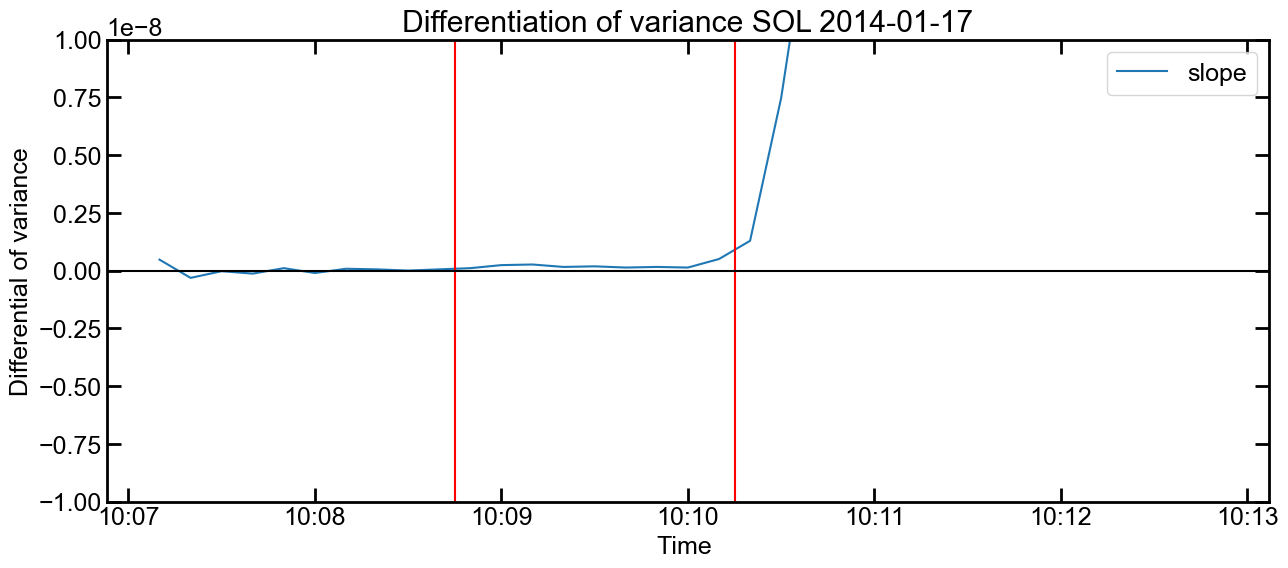

In [26]:
tmp=pd.Series(g_short_srch, g_tims_srch)
tmp.index=pd.to_datetime(tmp.index)
tmp = tmp.resample('10S').mean()

df=pd.DataFrame(tmp)
df['secvalue']=df.index.astype(np.int64)/1e+9
df['slope']= tmp.diff()/df['secvalue'].diff()


fig,ax = plt.subplots(figsize=(15, 6))
plt.title('Differentiation of variance SOL 2014-01-17')
plt.plot(df.index, df['slope'].values, label = 'slope')
ax.axvline(datetime.strptime("01/07/14 10:08:45", '%m/%d/%y %H:%M:%S'), color = 'r')
ax.axvline(datetime.strptime("01/07/14 10:10:15", '%m/%d/%y %H:%M:%S'), color = 'r')
ax.axhline(0, color = 'black')
ax.set_ylabel("Differential of variance")
ax.set_xlabel("Time ")
ax.set_ylim(-1e-8,1e-8)
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=1)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
plt.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
plt.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
plt.tick_params(which='major', size=10, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=5, width=2, direction='in', right='on')
plt.legend()
plt.show()

### Calculating TEM Graphs

In [18]:
trange_onset = a.Time("2014-01-07 10:08:45", "2014-01-07 10:09:15")
trange_onset = a.Time("2014-01-07 10:08:45", "2014-01-07 10:30:00")
trunc_onset = g15.truncate(trange_onset.start.iso,trange_onset.end.iso)
g_onset_tims = trunc_onset.index
g_onset_short = trunc_onset.quantity("xrsa").value - bckg_short
g_onset_long = trunc_onset.quantity("xrsb").value - bckg_long

# Fetching Temperature and Emission Measures
tmk, em = gtem.get_tem(g_onset_long, g_onset_short)

#calculating mean T, EM for backsubbed new data.
tmk_mnho=np.mean(tmk)
em_mnho=np.mean(em)
print("")
print('Mean T during onset: {0:.2f} MK'.format(tmk_mnho))
print('Mean EM during onset: {0:.2e} cm^-3'.format(em_mnho))


Mean T during onset: 14.67 MK
Mean EM during onset: 2.83e+49 cm^-3


#### Note the inaccuracies in the first 30 seconds of the interval - caused by imperfect background (using Hugh's one makes it look better)

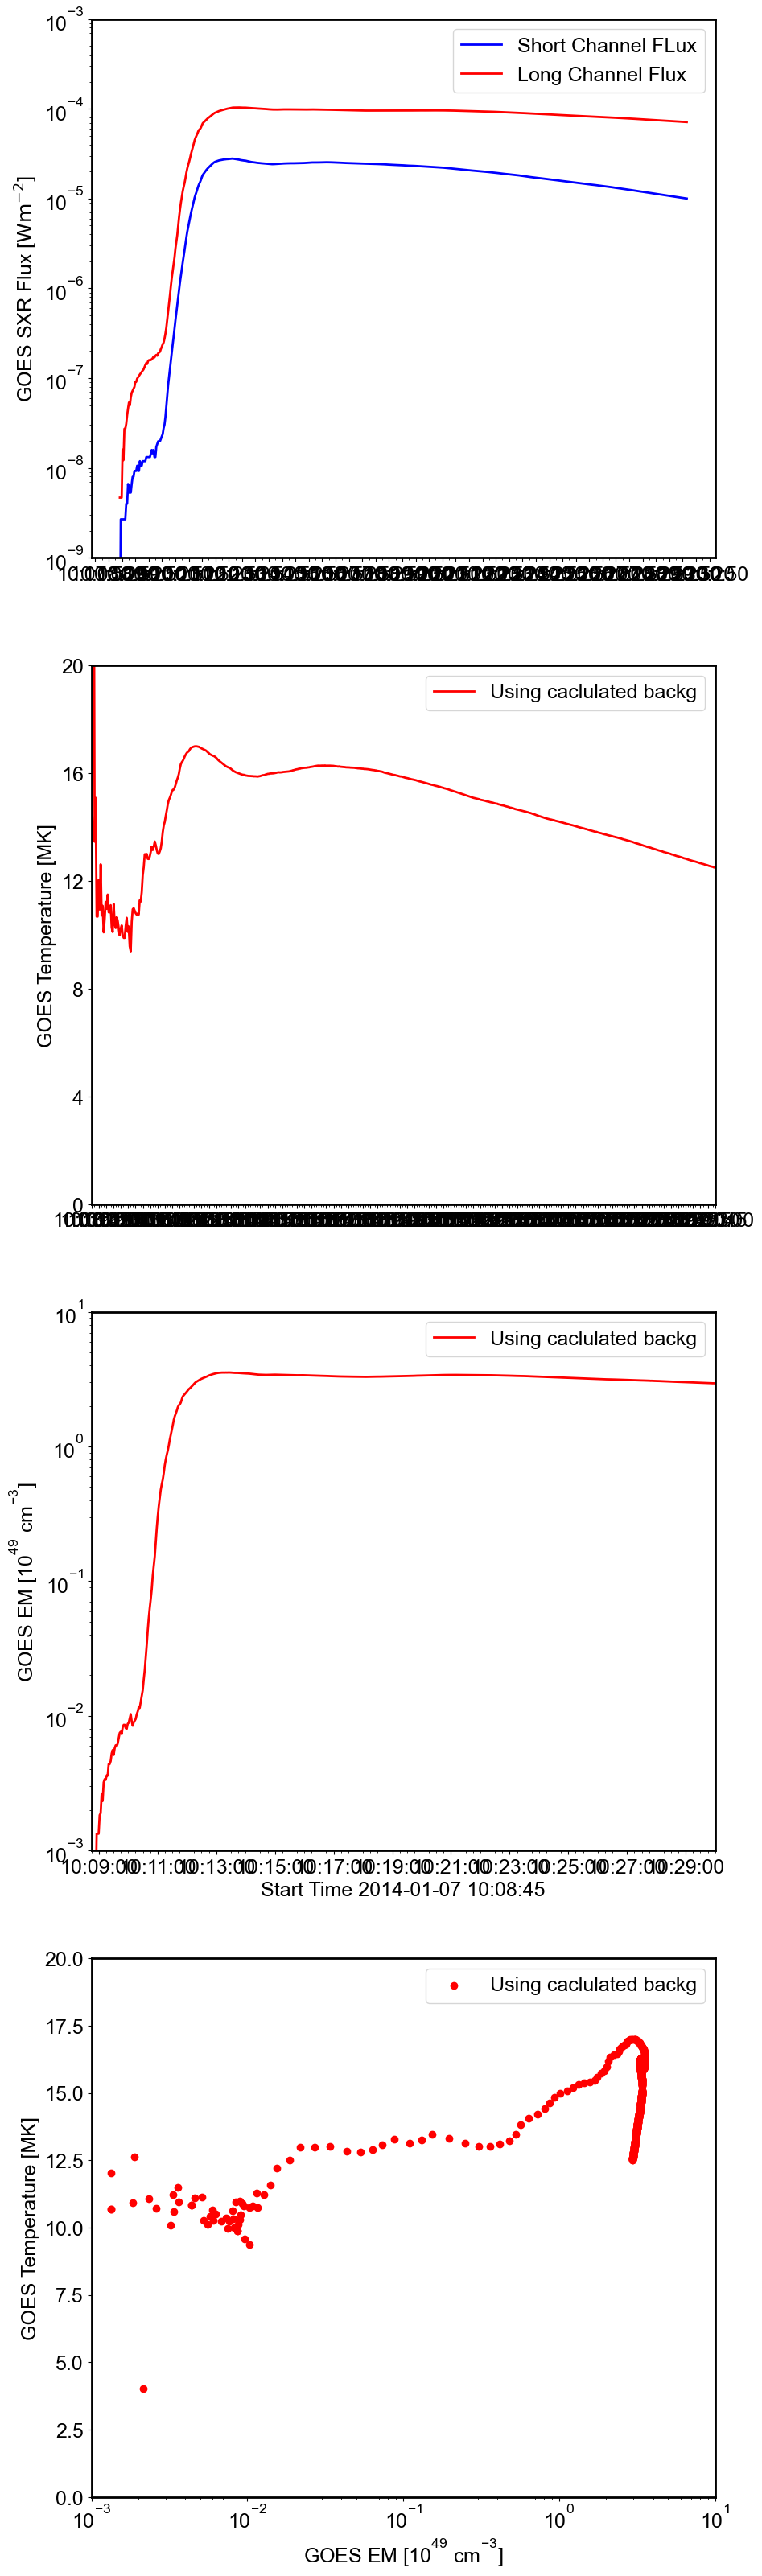

In [19]:
fig= plt.figure(figsize=(10, 40))

# First plot: non-background subtracted long time-series data
ax0 = fig.add_subplot(4, 1, 1)
plt.plot(g_onset_tims, g_onset_short, marker=None,color='blue',lw=2, label = "Short Channel FLux")
plt.plot(g_onset_tims, g_onset_long, marker=None,color='red',lw=2, label = 'Long Channel Flux')
ax0.set_ylabel("GOES SXR Flux [$\mathrm{Wm^{-2}}$]")
ax0.set_ylim([10**(-9), 10**(-3)])
#ax0.yaxis.set_major_locator(plt.MaxNLocator(10))
ax0.set_yscale("log")
ax0.set_xlabel(" ")
#ax0.set_xlim([trange.start.datetime,trange.end.datetime])
#ax0.set_xlim([(a.Time('11:30:00', '17:00')).start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.SecondLocator(interval=30)
minorx= matplotlib.dates.SecondLocator(interval=15)
ax0.xaxis.set_major_locator(majorx)
ax0.xaxis.set_minor_locator(minorx)
ax0.xaxis.set_major_formatter(myFmt)
#ax0.axvspan(backg_trange.start.datetime,backg_trange.e15nd.datetime,color='grey',alpha=0.4, label='Background')
plt.legend()

# Second plot: background subtracted fluxes to calculate Temperature over short timescale
ax1 = fig.add_subplot(4, 1, 2)
plt.plot(g_onset_tims, tmk,marker=None,color='red',lw=2, label = "Using caclulated backg")
ax1.set_ylabel("GOES Temperature [MK]")
ax1.set_xlabel(" ")
ax1.set_ylim([0,20])
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlim([trange_onset.start.datetime,trange_onset.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.SecondLocator(interval=15)
minorx= matplotlib.dates.SecondLocator(interval=5)
ax1.xaxis.set_major_locator(majorx)
ax1.xaxis.set_minor_locator(minorx)
ax1.xaxis.set_major_formatter(myFmt)
plt.legend()

ax2 = fig.add_subplot(4, 1, 3)
plt.plot(g_onset_tims,em*1e-49,marker=None,color='red',lw=2, label = "Using caclulated backg") # Current visualisation using my background
ax2.set_ylabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax2.set_xlabel("Start Time "+trange_onset.start.iso[:-4])
ax2.set_ylim([1e-3,1e1])
ax2.set_yscale("log")
ax2.set_xlim([trange_onset.start.datetime,trange_onset.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.MinuteLocator(interval=2)
minorx= matplotlib.dates.SecondLocator(interval=15)
ax2.xaxis.set_major_locator(majorx)
ax2.xaxis.set_minor_locator(minorx)
ax2.xaxis.set_major_formatter(myFmt)
plt.legend()

ax3 = fig.add_subplot(4, 1, 4)
plt.scatter(em*1e-49,tmk,marker=None,color='red', label = "Using caclulated backg")
ax3.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax3.set_ylabel("GOES Temperature [MK]")
ax3.set_xlim([1e-3,1e1])
ax3.set_ylim([0,20])
ax3.set_xscale("log")
plt.legend()


plt.show()